In [14]:
import import_ipynb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn
import time
import os

#### Import  functions to extract and prepare data

In [12]:
from extraction import extractionTrain, extractionTitanicTailor, extractionSwimWorld
from prepareData import prepareData
from confusion_matrix import plot_confusion_matrix

#### Extract data from the csv files

In [25]:
path = os.path.abspath(".")
file_name = [path + '\inputs\train.csv', path + '\inputs\titanic_tailor.csv',path  + '\inputs\swimworld.csv']

X, y, names = extractionTrain (file_name[0]) 
X_tailor= extractionTitanicTailor (file_name[1],names) 
X_swim = extractionSwimWorld (file_name[2], names)

OSError: [Errno 22] Invalid argument: 'C:\\Users\\Mathieu Pichon\\Desktop\\Code GitHub\\titanic challenge\\inputs\train.csv'

#### If required the new features can be added to the training set in order to assess the new performance with this featre

In [4]:
addTailor = False 
addSwim = False

# Improve data with tailor file #
if addTailor:
    for i in range(len(X)):
        X[i].append(X_tailor[i][0])
        X[i].append(X_tailor[i][1])    

# Improve data with swimworld file #
if addSwim:
    for i in range (len(X_swim)):
        X[i].append(X_swim[i])

#### Scaling the data (input data are very heterogenous)

In [5]:
scaling = True
if scaling:
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

#### Carry out a PCA to reduce the dimension of the problem

In [6]:
PCA = True
n_components_PCA = 6
X_train, X_test, y_train, y_test = prepareData(X, y, PCA, n_components_PCA)

#### 1st classifier: Support Vector Machine

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

t_start_SVM = time.time()
# the param grid is used to obtain the best parameter
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }    
clf_SVM = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf_SVM = clf_SVM.fit(X_train, y_train)
t_SVM = round(time.time() - t_start_SVM, 3)

# Prediction
y_pred_SVM = clf_SVM.predict(X_test)

c:\users\mathieu pichon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


#### 2d classifier: Fully Connected Neural Network

In [8]:
from sklearn.neural_network import MLPClassifier

t_start_NN = time.time()
clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5,5,4),random_state=1)
clf_NN.fit(X_train, y_train)
t_NN = round(time.time() - t_start_NN, 3)

#Prediction
y_pred_NN = clf_NN.predict(X_test)
  

#### 3d classifier: Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

t_start_RF = time.time()
clf_RF = RandomForestClassifier(max_depth=2, random_state=0)
clf_RF.fit(X_train, y_train)
t_RF = round(time.time() - t_start_NN, 3)

# Prediction
y_pred_RF = clf_RF.predict(X_test)
 

c:\users\mathieu pichon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Compute the accuracy and compare the results

In [10]:
accuracy_SVM = round(accuracy_score(y_test,y_pred_SVM),2)
accuracy_NN = round(accuracy_score(y_test,y_pred_NN),2)
accuracy_RF = round(accuracy_score(y_test,y_pred_RF),2)

print ("Accuracy reached with SVM : {} in {} s".format(accuracy_SVM, t_SVM))
print ("Accuracy reached with NN : {} in {} s".format(accuracy_NN, t_NN))
print ("Accuracy reached with RF : {} in {} s".format(accuracy_RF, t_RF))

Accuracy reached with SVM : 0.75 in 38.326 s
Accuracy reached with NN : 0.76 in 0.265 s
Accuracy reached with RF : 0.78 in 0.354 s


#### Confusion Matrices

Confusion matrix, without normalization


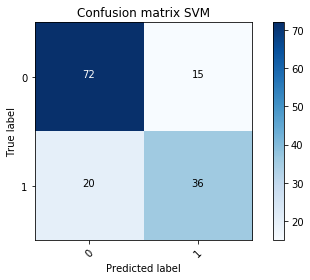

In [11]:
conf_mat_SVM = confusion_matrix(y_test,y_pred_SVM, [0, 1] )
conf_mat_NN = confusion_matrix(y_test,y_pred_NN, [0, 1] )
conf_mat_RF = confusion_matrix(y_test,y_pred_RF, [0, 1] )

matrix_to_plot = conf_mat_NN
plot_confusion_matrix(matrix_to_plot, classes = [0,1],normalize = False, title = 'Confusion matrix SVM',cmap=plt.cm.Blues)
